In [1]:
# importing required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# importing dataset 

data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# As we can see the columns and the values are in the strage format. This are the dataset provider has applied PCA 
# transformation on the original numerical features and compressed it into 28 principal components. 
# Only two features have not been anonymized i.e. Time and Amount. 

In [4]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, 
# excluding ``NaN`` values. Analyzes both numeric and object series, as well as ``DataFrame`` column sets of mixed data types.
# The output will vary depending on what is provided.the dataset provider has applied PCA transformation on the original numerical features and compressed it into 28 principal components. Only two features have not been anonymized i.e. Time and Amount. The feature Class is the target column with user labels as 0 - non-fraudulent and 1 - fraudulent.

# Describe includes :
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding columns based on their dtype.

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Lets take a view on the type of the column values are used
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Lets check for the null values 
(data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [7]:
# so there are no null values i.e. data is clean  now also check for the duplicate vals
data.duplicated().sum()

1081

In [8]:
# Now lets perform EDA of the given data in order to understand the patterns, spot anomalies or differences, 
# and other features that best summarise the main characteristics of a data set.

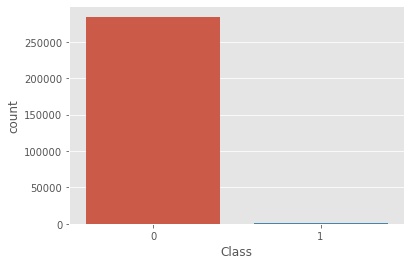

In [9]:
ax = sns.countplot(x='Class' , data=data)
plt.show()

In [10]:
# Here above plot states the imbalance relationship between 2 classes 
# Since most of the features are in PCA form except for Time and Amount, we will have to take a deeper look into these two features. 

In [11]:
# Nocheck the dependancy of the cols i.e. correlation by using heatmap.

corr = data.corr()
print(corr)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

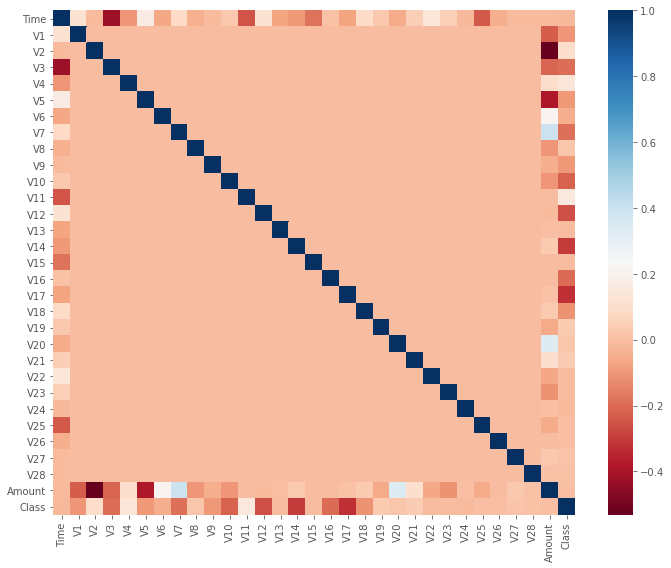

In [12]:
plt.figure(figsize=(10,8))
heat_map = sns.heatmap(corr , xticklabels=data.columns, yticklabels=data.columns, cmap='RdBu' )
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


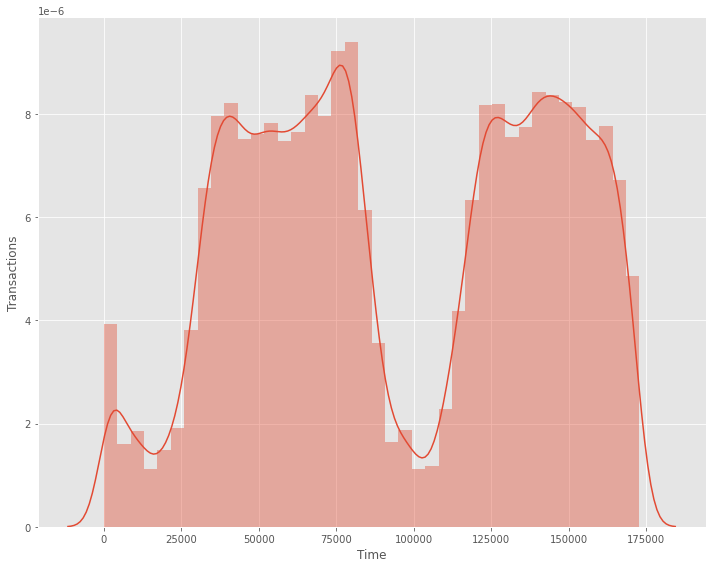

In [24]:
# Now to get more understanding about the transactions made in an hour classs 0 (not fraud).
data_copy = data[data['Class'] == 0]

plt.figure(figsize = (10 , 8))
sns.distplot(data_copy['Time'] , bins=40, kde=True)

plt.xlabel('Time')
plt.ylabel('Transactions')
plt.tight_layout()
plt.show()

In [ ]:
# now for class 1 (fraud)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


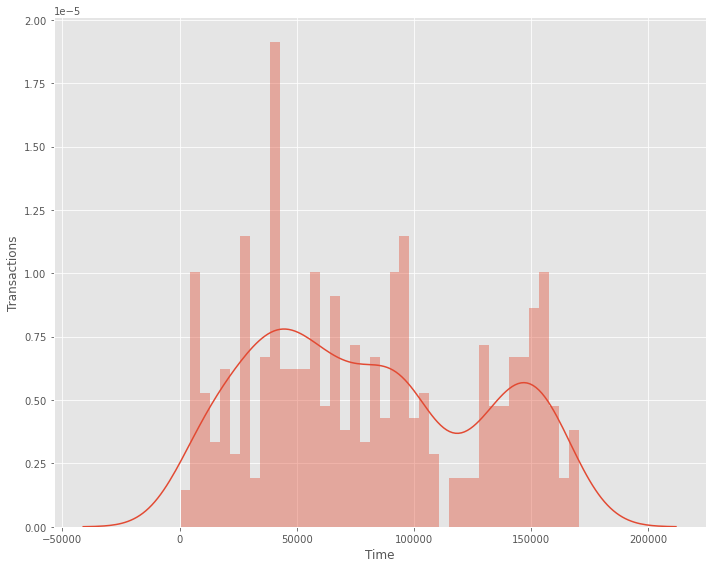

In [25]:
data_copy1 = data[data['Class'] == 1]

plt.figure(figsize = (10 , 8))
sns.distplot(data_copy1['Time'] , bins=40, kde=True)

plt.xlabel('Time')
plt.ylabel('Transactions')
plt.tight_layout()
plt.show()

In [31]:
# Now check the fraud cases and aslo the non fraud
fraud_cases = data[data['Class']==1]

non_fraud_cases = data[data['Class']==0]

suc_percent = len(fraud_cases)/float(len(non_fraud_cases))
print(suc_percent)
print('Fraud Cases :', len(fraud_cases))
print('valid Cases :', len(non_fraud_cases))

0.0017304750013189597
Fraud Cases : 492
valid Cases : 284315


In [13]:
# split the dataset
X = data.iloc[:, 1:30]
y = data.iloc[:, -1]

In [14]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [15]:
# Now we have to rescale the features.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
85606,-2.181700,-1.081516,-0.455676,-0.469416,3.181412,2.792502,-0.969722,1.514169,-0.270947,-0.616951,...,0.725584,-0.010621,-0.765830,-0.033177,1.036212,0.164195,0.237369,0.210396,-0.169310,55.83
88765,0.966174,-0.436168,1.236803,0.735214,-0.525551,1.525499,-1.014347,0.704637,1.032686,-0.405561,...,-0.302703,0.040025,0.407304,0.208419,-0.613252,-0.136451,0.427657,0.082106,0.014315,11.50
278969,-0.133786,0.980320,-0.256613,-0.764404,1.344491,-0.432592,1.034280,-0.067171,-0.197342,-1.124901,...,-0.111243,-0.306188,-0.898982,-0.068233,-0.083356,-0.549305,0.136005,0.107416,0.194498,0.89
165839,1.097971,-0.974633,-0.599038,4.389753,-0.434954,0.319253,0.375607,-0.096094,-0.303140,1.101282,...,0.511187,0.332687,0.323639,-0.280183,0.076090,-0.045856,0.088169,-0.079773,0.024493,410.62
223172,0.132701,0.632600,-0.047073,-0.618284,0.648191,-0.620230,1.104518,-0.239833,-0.237938,-0.532971,...,-0.043306,0.197347,0.534069,-0.143050,-0.681905,-0.150104,0.353270,-0.001355,0.030638,52.37


In [ ]:
# Now its time to create a model in order  to make future prediction acurate.

# First start with the svc :

In [16]:
from sklearn.svm import SVC
svc_model = SVC()


In [17]:
svc_model.fit(X_train,y_train)

SVC()

In [18]:
y_pred = svc_model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.82      0.32      0.46       144

    accuracy                           1.00     85443
   macro avg       0.91      0.66      0.73     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
# Printing outputs :
print('confusion matrix : ' , confusion_matrix(y_test, y_pred))
print('Accuracy :',accuracy_score(y_test, y_pred))
print('ROC Accuracy:', roc_auc_score(y_test, y_pred))


confusion matrix :  [[85289    10]
 [   98    46]]
Accuracy : 0.998735999438222
ROC Accuracy: 0.6596636048879041


In [37]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier()
rand_for.fit(X_train , y_train)
y1_pred = rand_for(X_test)


TypeError: 'RandomForestClassifier' object is not callable

In [ ]:
print(classification_report(y_test , y1_pred))

In [ ]:
# Printing confusion matrix
print('confusion matrix : ' , confusion_matrix(y_test, y1_pred))
print('Accuracy :',accuracy_score(y_test, y1_pred))
print('ROC Accuracy:', roc_auc_score(y_test, y1_pred))


# Now train data using Decision tree :

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
# fit
decision_tree.fit(X_train,y_train)
DecisionTreeClassifier(random_state=0)
# Making predictions
pred_tree = decision_tree.predict(X_test)
# Let's check the report of our default model
print(classification_report(y_test,pred_tree))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.73      0.78      0.75       144

    accuracy                           1.00     85443
   macro avg       0.87      0.89      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [35]:
# printing the outputs
print(confusion_matrix(y_test, pred_tree))
print('Accuracy score:',accuracy_score(y_test, pred_tree))
print('ROC Accuracy:', roc_auc_score(y_test, pred_tree))

[[85258    41]
 [   32   112]]
Accuracy score: 0.9991456292499094
ROC Accuracy: 0.8886485578181847
